In [1]:
import nltk
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [*] abc................. Australian Broadcasting Commission 2006
  [*] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [*] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [*] brown............... Brown Corpus
  [*] brown_tei........... Brown Corpus (TEI XML Version)
  [*] cess_cat............ CESS-CAT Treebank
  [*] cess_esp............ CESS-ESP Treebank
  [*] chat80.....

In [2]:
import numpy as np
import pandas as pd

In [4]:
messages = pd.read_csv('sms_spam_collection.csv')
messages.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
messages

label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [6]:
messages[messages['label']=='spam']

label                                            message
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
...    ...                                                ...
5537  spam  Want explicit SEX in 30 secs? Ring 02073162414...
5540  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547  spam  Had your contract mobile 11 Mnths? Latest Moto...
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...
5567  spam  This is the 2nd time we have tried 2 contact u...

[747 rows x 2 columns]

In [7]:
messages.describe()

label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

In [8]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
messages['length'] = messages['message'].apply(len)
messages

label                                            message  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
...    ...                                                ...     ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160
5568   ham               Will ü b going to esplanade fr home?      36
5569   ham  Pity, * was in mood for that. So...any other s...      57
5570   ham  The guy did some bitching but I acted like i'd...     125
5571   ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]

## Data Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

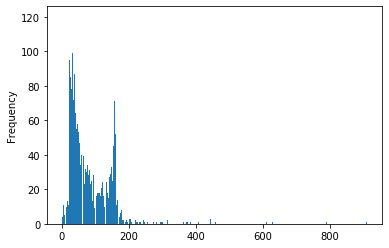

In [14]:
messages['length'].plot(bins=1000, kind='hist')

In [16]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [17]:
messages[messages['length'] == 2]['message'].iloc[0]

'Ok'

In [18]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A2C322CE08>,
      dtype=object)

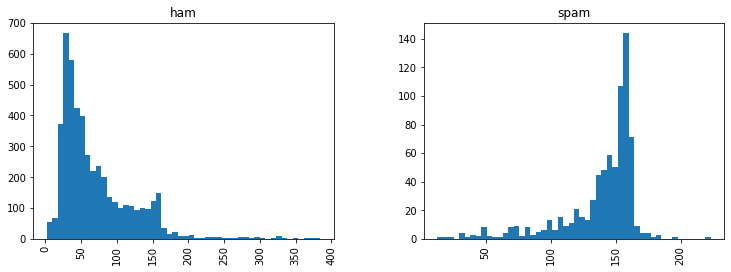

In [19]:
messages[messages['length']<400].hist(column='length', by='label', bins=50, figsize=(12,4))

## Text Pre-Processing

### 1. Remove punctuation (tanda baca) 

In [24]:
import string

message_sample = 'Sample message! Notice: it has punctuation.'

print(string.punctuation)
nopunc = [char for char in message_sample if char not in string.punctuation]

print(nopunc)
nopunc = ''.join(nopunc)
print(nopunc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']
Sample message Notice it has punctuation


### 2. Remove stopwords

In [26]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [28]:
clean_message = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_message

['Sample', 'message', 'Notice', 'punctuation']

In [29]:
messages

label                                            message  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
...    ...                                                ...     ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160
5568   ham               Will ü b going to esplanade fr home?      36
5569   ham  Pity, * was in mood for that. So...any other s...      57
5570   ham  The guy did some bitching but I acted like i'd...     125
5571   ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]

In [30]:
stop = []
for word in stopwords.words('english'):
    s = [char for char in word if char not in string.punctuation]
    stop.append(''.join(s))
stop.extend(['dun', 'u', 'n', 'wif', 'oni'])
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [31]:
def text_process(message):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # cleaning punctuation
    nopunc = [char for char in message if char not in string.punctuation]
    
    # join the nopunc
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stop]

In [32]:
messages.head()

label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

In [33]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, g...
1                                       [Ok, lar, Joking]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3                      [say, early, hor, c, already, say]
4          [Nah, think, goes, usf, lives, around, though]
                              ...                        
5567    [2nd, time, tried, 2, contact, £750, Pound, pr...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

### Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand and so I'll leave you to explore those more advanced methods through the [NLTK book online](http://www.nltk.org/book/).

For now we will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

## Vectorization
Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Word 1 count</th> <th>Word 2 count</th> <th>...</th> <th>Word N count</th> 
</tr>
<tr>
<td><b>Message 1</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Message 2</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Message N</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cvt = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [38]:
cvt.vocabulary_

{'Go': 2053,
 'jurong': 7517,
 'point': 8877,
 'crazy': 5739,
 'Available': 1110,
 'bugis': 5189,
 'great': 6903,
 'world': 11115,
 'la': 7630,
 'e': 6183,
 'buffet': 5188,
 'Cine': 1483,
 'got': 6872,
 'amore': 4625,
 'wat': 10920,
 'Ok': 3051,
 'lar': 7663,
 'Joking': 2439,
 'Free': 1934,
 'entry': 6297,
 '2': 423,
 'wkly': 11076,
 'comp': 5590,
 'win': 11037,
 'FA': 1826,
 'Cup': 1551,
 'final': 6523,
 'tkts': 10469,
 '21st': 443,
 'May': 2792,
 '2005': 430,
 'Text': 3938,
 '87121': 871,
 'receive': 9212,
 'questionstd': 9119,
 'txt': 10643,
 'rateTCs': 9160,
 'apply': 4703,
 '08452810075over18s': 73,
 'say': 9514,
 'early': 6188,
 'hor': 7149,
 'c': 5232,
 'already': 4601,
 'Nah': 2935,
 'think': 10390,
 'goes': 6843,
 'usf': 10755,
 'lives': 7804,
 'around': 4748,
 'though': 10407,
 'FreeMsg': 1936,
 'Hey': 2212,
 'darling': 5834,
 '3': 543,
 'weeks': 10966,
 'word': 11102,
 'back': 4864,
 'Id': 2335,
 'like': 7762,
 'fun': 6721,
 'still': 10051,
 'Tb': 3915,
 'ok': 8528,
 'XxX': 

In [39]:
print(len(cvt.vocabulary_))

11372


In [42]:
max(cvt.vocabulary_.values())

11371

In [44]:
min(cvt.vocabulary_.values())

0

In [45]:
cvt.vocabulary_.values()

dict_values([2053, 7517, 8877, 5739, 1110, 5189, 6903, 11115, 7630, 6183, 5188, 1483, 6872, 4625, 10920, 3051, 7663, 2439, 1934, 6297, 423, 11076, 5590, 11037, 1826, 1551, 6523, 10469, 443, 2792, 430, 3938, 871, 9212, 9119, 10643, 9160, 4703, 73, 9514, 6188, 7149, 5232, 4601, 2935, 10390, 6843, 10755, 7804, 4748, 10407, 1936, 2212, 5834, 543, 10966, 11102, 4864, 2335, 7762, 6721, 10051, 3915, 8528, 4357, 10031, 5438, 9601, 11318, 9169, 1795, 5164, 9929, 10586, 4562, 8721, 8756, 9316, 2802, 3085, 2821, 3010, 4153, 9624, 5263, 1421, 3265, 909, 5687, 6685, 1422, 4204, 10784, 8367, 5790, 9588, 9213, 11359, 9018, 9373, 5490, 5246, 219, 1485, 5545, 2465, 4144, 326, 7164, 8178, 315, 8213, 3308, 6294, 4111, 7678, 5565, 8179, 5275, 1417, 2840, 1492, 1858, 58, 2341, 6856, 7122, 9889, 10901, 10261, 10111, 4673, 10514, 7523, 2382, 5753, 6285, 10481, 3482, 5382, 1353, 294, 427, 8935, 1405, 875, 1524, 364, 763, 382, 4032, 3401, 2131, 605, 7317, 4073, 292, 10961, 8072, 11312, 3270, 2409, 4046, 1378, 

In [47]:
len(cvt.get_feature_names())

11372

In [48]:
cvt.get_feature_names()

['0',
 '008704050406',
 '0089my',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '0207',
 '02070836089',
 '02072069400',
 '02073162414',
 '02085076972',
 '020903',
 '021',
 '050703',
 '0578',
 '06',
 '060505',
 '061104',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0794674629107880867867',
 '0796XXXXXX',
 '07973788240',
 '07XXXXXXXXX',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084528

In [49]:
message4 = messages['message'][3]
print(message4)
print(len(message4))

U dun say so early hor... U c already then say...
49


In [50]:
mes4cvt = cvt.transform([message4])
print(mes4cvt)

  (0, 4601)	1
  (0, 5232)	1
  (0, 6188)	1
  (0, 7149)	1
  (0, 9514)	2


In [52]:
print(cvt.get_feature_names()[4601])
print(cvt.get_feature_names()[5232])
print(cvt.get_feature_names()[6188])
print(cvt.get_feature_names()[7149])
print(cvt.get_feature_names()[9514])

already
c
early
hor
say


In [54]:
message_sparse = cvt.transform(messages['message'])
message_sparse.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [55]:
pd.set_option("display.max_columns", 12000)
message_spars_df = pd.DataFrame(data=message_sparse.toarray(), columns=cvt.get_feature_names())
message_spars_df

0  008704050406  0089my  0121  01223585236  01223585334  0125698789  02  \
0     0             0       0     0            0            0           0   0   
1     0             0       0     0            0            0           0   0   
2     0             0       0     0            0            0           0   0   
3     0             0       0     0            0            0           0   0   
4     0             0       0     0            0            0           0   0   
...  ..           ...     ...   ...          ...          ...         ...  ..   
5567  0             0       0     0            0            0           0   0   
5568  0             0       0     0            0            0           0   0   
5569  0             0       0     0            0            0           0   0   
5570  0             0       0     0            0            0           0   0   
5571  0             0       0     0            0            0           0   0   

      020603  0207  02070836089  02072069400  02073162414  02085076972  \
0          0     0            0            0            0            0   
1          0     0            0            0            0            0   
2          0     0            0            0            0            0   
3          0     0            0            0            0            0   
4          0     0            0            0            0            0   
...      ...   ...          ...          ...          ...          ...   
5567       0     0            0            0            0            0   
5568       0     0            0            0            0            0   
5569       0     0            0            0            0            0   
5570       0     0            0            0            0            0   
5571       0     0            0            0            0            0   

      020903  021  050703  0578  06  060505  061104  07008009200  07046744435  \
0          0    0       0     0   0       0       0            0            0   
1          0    0       0     0   0       0       0            0            0   
2          0    0       0     0   0       0       0            0            0   
3          0    0       0     0   0       0       0            0            0   
4          0    0       0     0   0       0       0            0            0   
...      ...  ...     ...   ...  ..     ...     ...          ...          ...   
5567       0    0       0     0   0       0       0            0            0   
5568       0    0       0     0   0       0       0            0            0   
5569       0    0       0     0   0       0       0            0            0   
5570       0    0       0     0   0       0       0            0            0   
5571       0    0       0     0   0       0       0            0            0   

      07090201529  07090298926  07099833605  071104  07123456789  0721072  \
0               0            0            0       0            0        0   
1               0            0            0       0            0        0   
2               0            0            0       0            0        0   
3               0            0            0       0            0        0   
4               0            0            0       0            0        0   
...           ...          ...          ...     ...          ...      ...   
5567            0            0            0       0            0        0   
5568            0            0            0       0            0        0   
5569            0            0            0       0            0        0   
5570            0            0            0       0            0        0   
5571            0            0            0       0            0        0   

      07732584351  07734396839  07742676969  07753741225  0776xxxxxxx  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0          

In [59]:
message_spars_df.loc[3,['already', 'c', 'early', 'hor', 'say']]

already    1
c          1
early      1
hor        1
say        2
Name: 3, dtype: int64

In [64]:
# shape dari message_spars
print('Shape of message_spars: ', message_sparse.shape)
# jumlah data non-zero di message_spars
print('Shape of message_spars: ', message_sparse.nnz)

Shape of message_spars:  (5572, 11372)
Shape of message_spars:  48847


In [65]:
# jumlah data yang zero
(5572 * 11372) - 48847

63315937

In [67]:
sparsity = (message_sparse.nnz * 100) / (5572 * 11372)
sparsity

0.07708856073745947